<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نویز داریم؟
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قرار است کمی بیشتر و بصورت عملی با نویز در تصویر کار کنیم. لطفا کدها را بدرستی تکمیل کنید تا در نهایت امتیاز بالا از تمرین دریافت کنید.
</font>
</p>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام تمرین را وارد می‌کنیم.
</font>
</p>

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
لطفا تصویری که در ابتدا در اختیار شما قرار گرفته است را بصورت سطح خاکستری بارگذاری کرده و سپس به کمک <code>matplotlib</code> آن را رسم کنید.
</font>
</p>

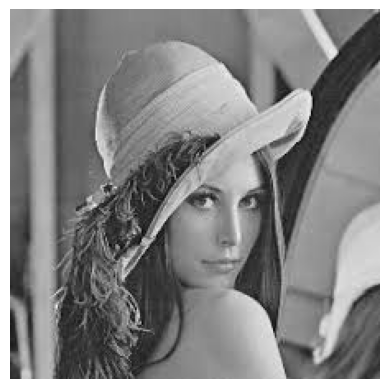

In [21]:
# Read the image
img = cv2.imread('../Data/lena.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم هیستوگرام تصویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای سلول زیر، هیستوگرام تصویر اولیه رسم میشود. هدف نگاه و مقایسه هیستوگرام یک تصویر بدون نویز با تصویر نویز داری است که در ادامه معرفی میشود.
</font>
</p>


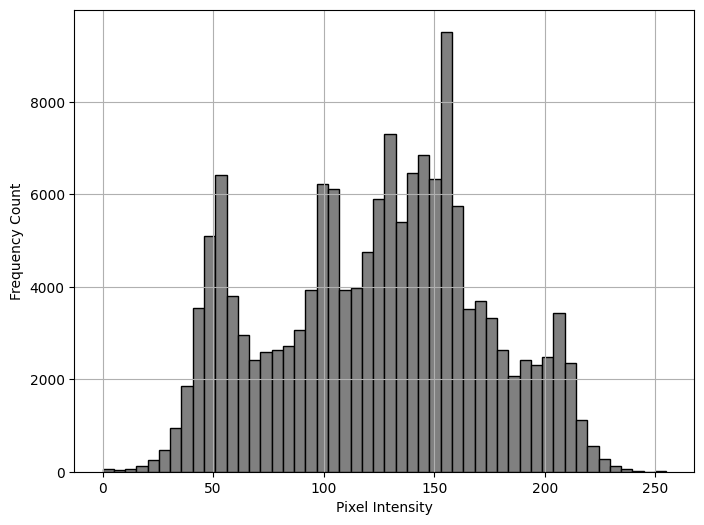

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(img.flatten(), bins=50, range=[0, 255], color='gray', edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency Count')
plt.grid(True)
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
افزودن نویز گوسی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال در سلول زیر، تابع را تکمیل کنید. این تابع باید تصویری را در ورودی بگیرد و نویز گوسی روی تصویر ایجاد کند. پس از نوشتن تابع در سلول بعد از آن تصویر نویز دار به همراه هیستوگرام تصویر نویز گوسی را رسم کنید.
</font>
</p>


In [23]:
def add_gaussian_noise(image, mean=5, std=20):
    # create the noise
    noise = np.random.normal(mean, std, image.shape)
    # add the created noise to image
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

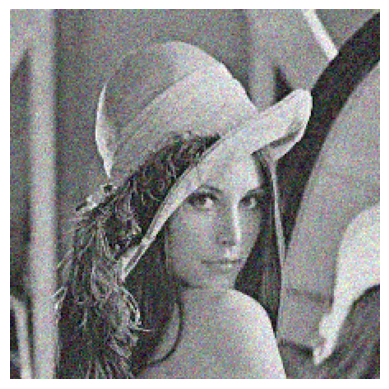

In [24]:
gaussian_noisy = add_gaussian_noise(img)

cv2.imwrite('gausi.png',gaussian_noisy)
plt.imshow(gaussian_noisy,cmap='gray')
plt.axis('off')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشاهده میشود هیستوگرام (نمودار توزیع شدت پیکسل‌ها) به شکل یک زنگوله (توزیع نرمال) می باشد که یعنی احتمالاً نویز گاوسی است. یعنی بیشتر پیکسل‌ها در میانگین شدت (مثلاً 128 برای تصویر خاکستری) متمرکز هستند، و پیکسل‌های خیلی تیره (نزدیک 0) یا خیلی روشن (نزدیک 255) کم هستند.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
افزودن نویز فلفل نمک
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال تابع زیر را تکمیل کنید. این تابع روی تصویر اصلی یک نویز فلفل نمک ایجاد میکند. در ادامه هیستوگرام و تصویر جدید را رسم کرده و از لحاظ ظاهری با تصاویر و هیستوگرام های قبل مقایسه کنید.
</font>
</p>


In [33]:
def add_salt_and_pepper_noise(image, amount=0.15):
    noisy_image = np.copy(image)
    num_salt = np.ceil(amount * image.size)
    num_pepper = np.ceil(amount * image.size)
    coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1
    coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return np.clip(noisy_image, 0, 255).astype(np.uint8)

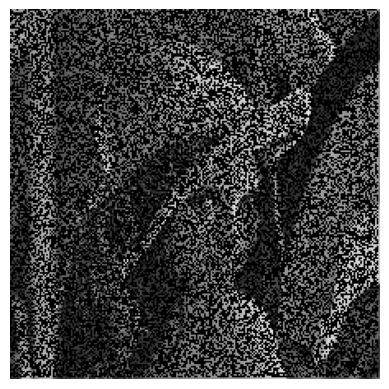

In [34]:
salt_pepper = add_salt_and_pepper_noise(img)

plt.imshow(salt_pepper,cmap='gray')
cv2.imwrite('saltpep.png',salt_pepper)
plt.axis('off')
plt.show()

# plot the hist of gausian image
...
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویر هیستوگرام پیک‌های تیز و مشخصی در 0 (سیاه) و 255 (سفید) دارد پس احتمالاً نویز نمک‌فلفل است. بقیه پیکسل‌ها معمولاً در شدت‌های میانی (مثلاً 128) هستند.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تشخیص دیگر نویزهای معرفی شده به کمک مولفه های آماری کار چندان ساده ای نیست و الگوریتم ثابت ندارد و ممکن است برای تصاویر گوناگون به پاسخ های متفاوت برسیم برای مثال اگر هیستوگرام تصویر دارای نویز اسپکل را رسم کنیم احتمالا با نویز فلفل نمک اشتباه گرفته خواهد شد. قابل تشخیص و تمیز هستند اما برای همه تصاویر نمیشود الگوریتم تقریبا ثابت معرفی کرد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
الگوریتم تشخیص نویز
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ادامه سعی خواهیم کرد که به کمک ویژگی های اماری تابعی بنویسیم که تصویر نویز دار دریافت کرده و تشخیص دهد آیا نویز تصویر گوسی است یا فلفل نمک. این کار هنگامی که با مجموعه داده بزرگی از تصاویر طرف هستیم خیلی کمک کننده خواهد بود و در پیش پردازش تصاویر برای مثلا آموزش شبکه عصبی کار را راحت خواهد کرد.
</font>
</p>


In [27]:
def detect_gaussian_salt_pepper_noise(image):
    
    # ابتدا انحراف معیار کل تصویر را محاسبه کنید. اگر مقدار انحراف معیار از 20 کمتر بود احتمالا تصویر نویز ندارد
    ...
    ...
    ...
    return "No Noise"

    # بررسی نویز نمک‌فلفل: پیکسل‌های شدید (0 یا 255)
    # برای بررسی نویز فلفل نمک باید تمام پیکسل های تصویر را محاسبه کرد یعنی چند پیکسل دارد تصویر
    total_pixels = None
    # حال مجموع تعداد پیکسل های با مقادیر 0 یا 255 را با هم محاسبه و جمع میکنیم. یعنی مجموعا چند پیکسل داریم که مقادیر شدت روشنایی انها 0 یا 255 هستند
    extreme_pixels = None

    # نسبت پیکسل های مقادیر 0 یا 255 به کل پیکسل های تصویر اگر بیشتر از 0.005 باشد احتمالا تصویر نویز فلفل و نمک دارد.
    return "Salt-and-Pepper"

    # به عنوان تمرین، چگونگی اینکه تصویر نویز گوسی دارد یا خیر را الگوریتمش را شما بنویسید
    return "Gaussian"


    # اگر هیچ‌کدام مشخص نشد، فرض می‌کنیم نویز ندارد (برای سادگی)
    return "No Noise"

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [28]:
import zipfile
from inspect import getsource

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """import cv2
import numpy as np
from scipy.stats import kurtosis, skew
"""
%save detect_gaussian_salt_pepper_noise imp + getsource(detect_gaussian_salt_pepper_noise)


file_names = ["detect_gaussian_salt_pepper_noise.py", "code.ipynb"]
compress(file_names)

The following commands were written to file `detect_gaussian_salt_pepper_noise.py`:
import cv2
import numpy as np
from scipy.stats import kurtosis, skew
def detect_gaussian_salt_pepper_noise(image):

    # ابتدا انحراف معیار کل تصویر را محاسبه کنید. اگر مقدار انحراف معیار از 20 کمتر بود احتمالا تصویر نویز ندارد
    ...
    ...
    ...
    return "No Noise"

    # بررسی نویز نمک‌فلفل: پیکسل‌های شدید (0 یا 255)
    # برای بررسی نویز فلفل نمک باید تمام پیکسل های تصویر را محاسبه کرد یعنی چند پیکسل دارد تصویر
    total_pixels = None
    # حال مجموع تعداد پیکسل های با مقادیر 0 یا 255 را با هم محاسبه و جمع میکنیم. یعنی مجموعا چند پیکسل داریم که مقادیر شدت روشنایی انها 0 یا 255 هستند
    extreme_pixels = None

    # نسبت پیکسل های مقادیر 0 یا 255 به کل پیکسل های تصویر اگر بیشتر از 0.005 باشد احتمالا تصویر نویز فلفل و نمک دارد.
    return "Salt-and-Pepper"

    # به عنوان تمرین، چگونگی اینکه تصویر نویز گوسی دارد یا خیر را الگوریتمش را شما بنویسید
    return "Gaussian"


    # اگر هیچ‌کدام مشخص 